# Decision Trees

Eventually, see https://towardsdatascience.com/understanding-random-forest-58381e0602d2


In [2]:
%run ~/.jupyter/config.ipy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import matplotlib.pyplot as plt
import numpy as np

from tree import DecisionTree

# Simple example

In [32]:
lim = 40
def f(x1, x2):
    val = x1**2 + x2**2 + 40 * np.sin(x1)
    res = np.zeros_like(x1)
    res[val > lim] = 2
    res[(val > 20) & (val < lim)] = 1
    return res

def f_x2(x1):
    return np.sqrt(lim - x1**2 - 40*np.sin(x1))

def f_x2_2(x1):
    return np.sqrt(20 - x1**2 - 40*np.sin(x1))

n_obj, n_feat = 1000, 2
x = np.random.random((n_obj, n_feat)) * 10
y = f(x[:, 0], x[:, 1])

In [27]:
t = DecisionTree()
t.fit(x, y)

In [28]:
n_pts, x_min, x_max = 3000, 0, 10
pts = np.linspace(x_min, x_max, num=n_pts)
xx, yy = np.meshgrid(pts, pts)
testX = np.concatenate((xx.flatten()[:,np.newaxis], yy.flatten()[:,np.newaxis]), axis=1)
testY = t.predict(testX)

/home/christopher/.virtualenvs/learning/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
/home/christopher/.virtualenvs/learning/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]


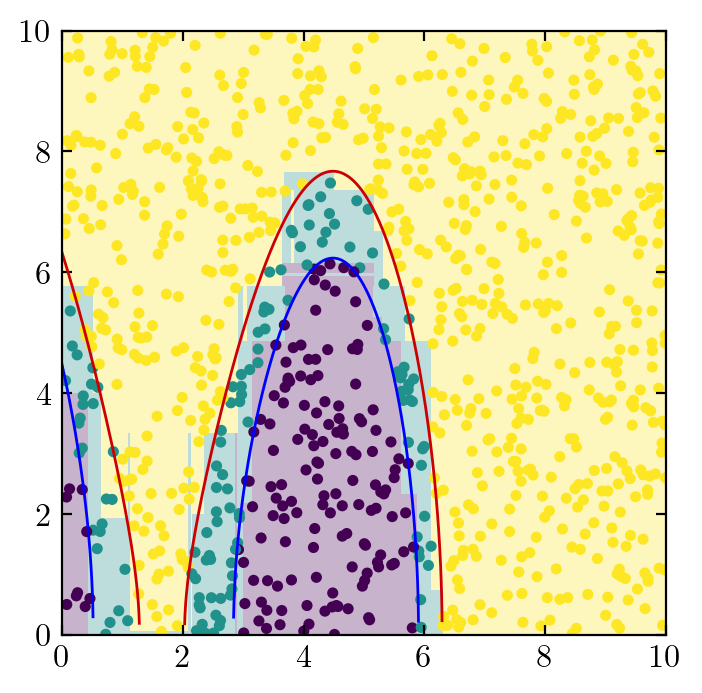

In [33]:
_, ax = plt.subplots()
ax.scatter(x[:,0], x[:,1], c=y)

ax.imshow(testY.reshape((n_pts, n_pts)), extent=(x_min, x_max, x_min, x_max), alpha=0.3, origin="lower")
ax.plot(pts, f_x2(pts))
ax.plot(pts, f_x2_2(pts))